# Сбор и разметка данных для машинного обучения
## Домашняя работа №3. Активное обучение.

### Definition of done
- Реализуйте базовую систему активного обучения. Обучите модель на небольшом подмножестве данных, а затем используйте ее для определения примеров, которые требуют разметки. Проведите этот процесс в нескольких итерациях, дополняя вашу разметку на основе предсказаний модели. (Можно использовать любые библиотеки, облегчающие построение пайплайна для активного обучения. 1в1 скопировать пример с лекции нельзя, но пользоваться как отправной точкой – можно)
- Опишите подход, который был выбран вами в качестве стратегии выбора данных для доразметки.
- Предоставьте отчет о данных, которые были выбраны моделью для доразметки (можно сложить в отдельную директорию/провизуализирвоать в ноутбуке)

In [31]:
import numpy as np
from IPython import display

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [32]:
# Функция для доразметки данных
def label_images(images, model, threshold=0.5):
    outputs = model.predict(images)

    # Неуверенные и уверенные предсказания
    uncertain_samples_indexes = np.where(np.max(outputs, axis=1) <= threshold)[0]
    certain_samples_indexes = np.where(np.max(outputs, axis=1) > threshold)[0]

    # Доразметка неуверенных предсказаний     
    for idx in uncertain_samples_indexes:
        predicted_class = np.argmax(outputs[idx])
        
        plt.imshow(images[idx])
        plt.show()

        print('Введите метку класса')
        user_label = int(input())
        outputs[idx, user_label] = 1

    return uncertain_samples_indexes, outputs

## Данные
Возьмем в качестве датасета CIFAR10.

In [33]:
NUM_CLASSES = 10
TEST_SIZE = 0.2

In [34]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, num_classes=NUM_CLASSES)

X_train, X_val, y_train, _ = train_test_split(X_train, y_train, test_size=TEST_SIZE, random_state=42)

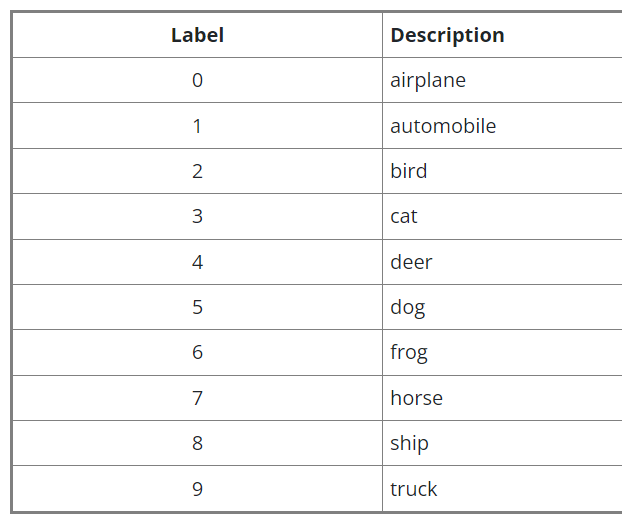

## Модель

In [35]:
EPOCHS = 10

In [36]:
model = keras.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(2, activation='linear'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

Обучим модель на размеченных данных и проверим качество на тестовой

In [37]:
model.fit(X_train, y_train, epochs=EPOCHS)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
1250/1250 [==============================] - 5s 3ms/step - loss: 2.2407 - accuracy: 0.1616
Epoch 2/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0977 - accuracy: 0.2078
Epoch 3/10
1250/1250 [==============================] - 4s 3ms/step - loss: 2.0005 - accuracy: 0.2295
Epoch 4/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8977 - accuracy: 0.2612
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.8093 - accuracy: 0.2844
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.7362 - accuracy: 0.3156
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6885 - accuracy: 0.3295
Epoch 8/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6576 - accuracy: 0.3382
Epoch 9/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.6309 - accuracy: 0.3490
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 1.6034 

## Активное обучение

В качестве стратегии выбора данных для разметки используется Uncertainty Sampling

In [38]:
NUM_SAMPLES = 15
ITERATIONS = 2

1/1 [==============================] - 0s 120ms/step


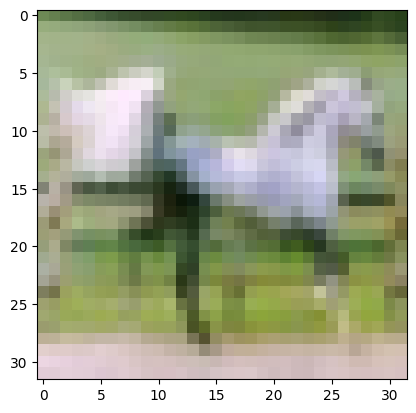

Введите метку класса


 7


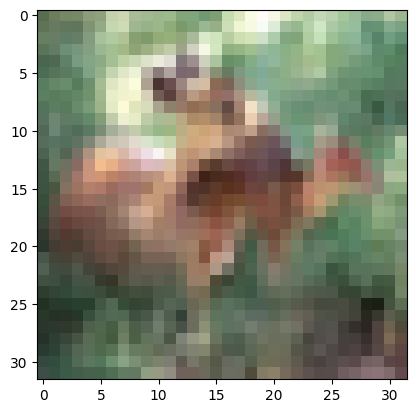

Введите метку класса


 6


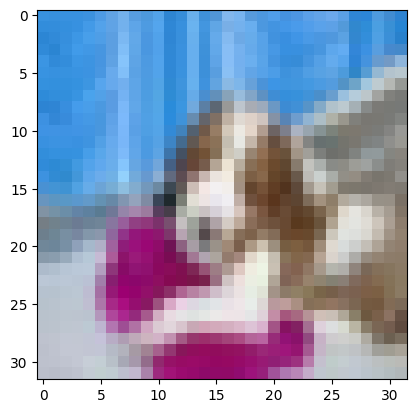

Введите метку класса


 5


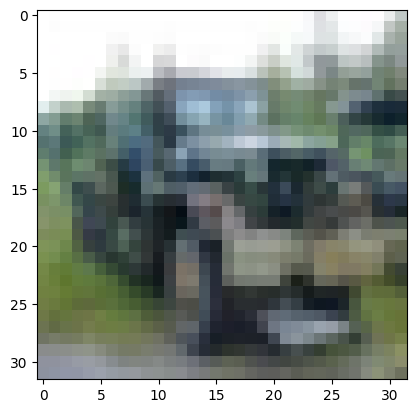

Введите метку класса


 9


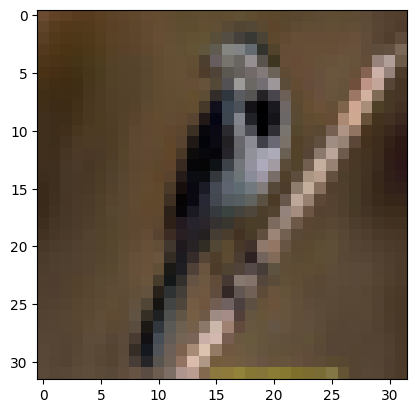

Введите метку класса


 2


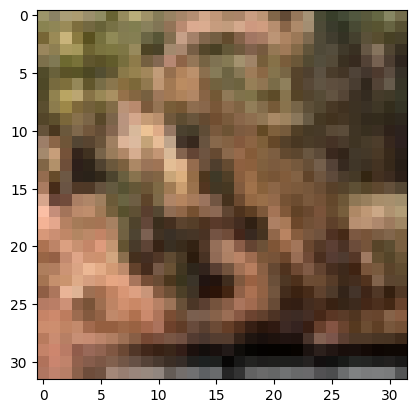

Введите метку класса


 6


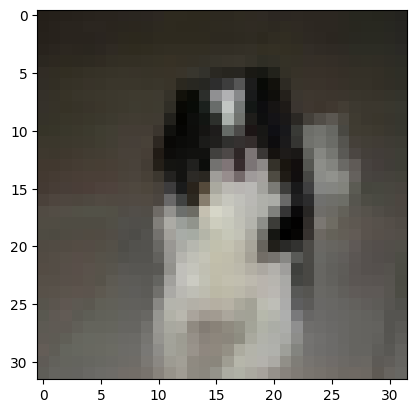

Введите метку класса


 5


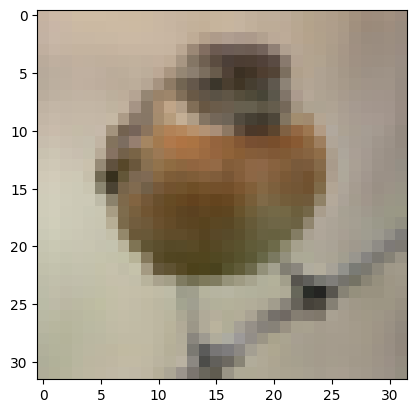

Введите метку класса


 2


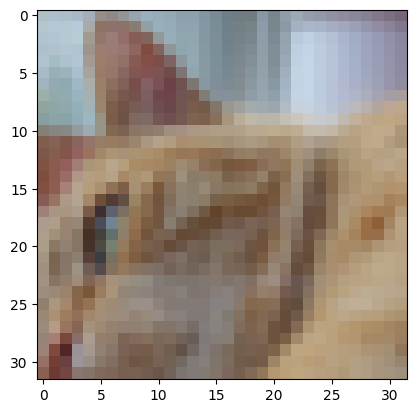

Введите метку класса


 3


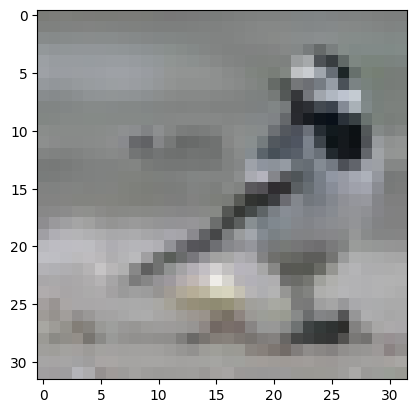

Введите метку класса


 2


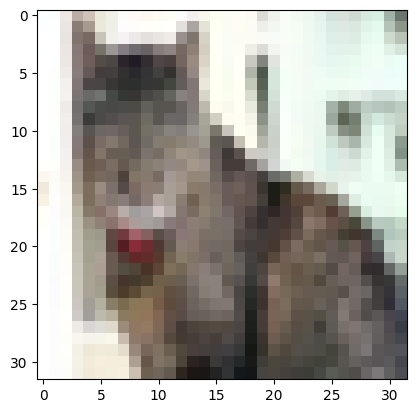

Введите метку класса


 3


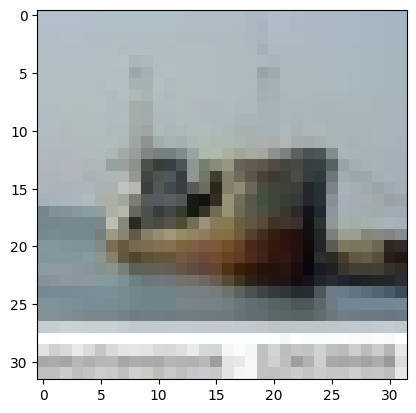

Введите метку класса


 8


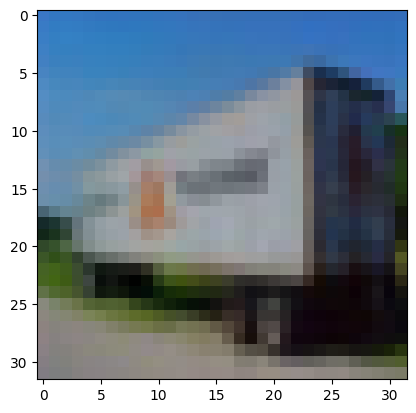

Введите метку класса


 9


Epoch 1/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.5868 - accuracy: 0.3692
Epoch 2/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.5693 - accuracy: 0.3767
Epoch 3/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.5522 - accuracy: 0.3836
Epoch 4/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.5381 - accuracy: 0.3885
Epoch 5/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.5256 - accuracy: 0.3946
Epoch 6/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.5122 - accuracy: 0.4001
Epoch 7/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.4980 - accuracy: 0.4064
Epoch 8/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.4850 - accuracy: 0.4113
Epoch 9/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.4738 - accuracy: 0.4167
Epoch 10/10
1/1 [==============================] - 0s 20ms/step


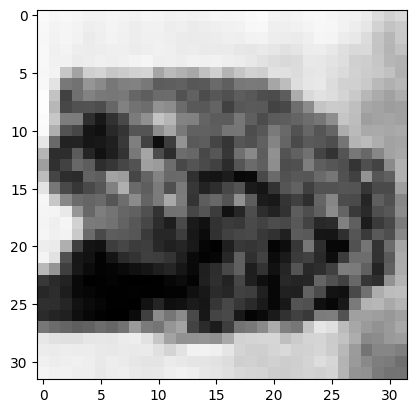

Введите метку класса


 6


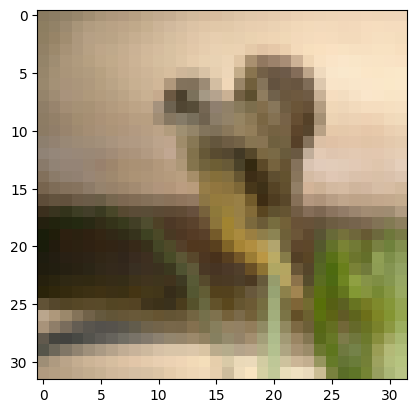

Введите метку класса


 2


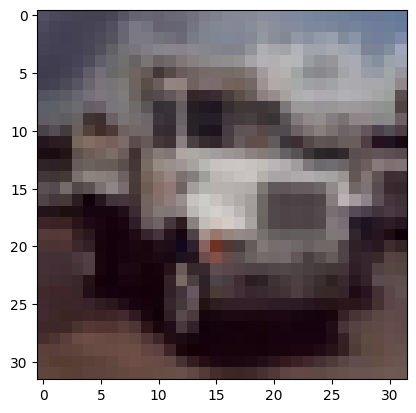

Введите метку класса


 9


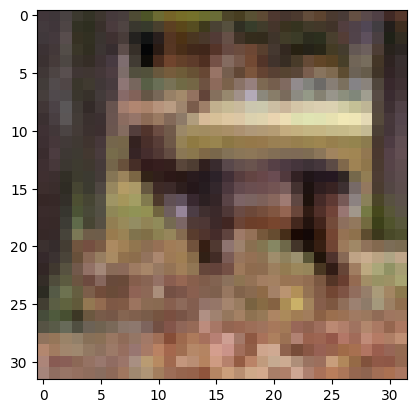

Введите метку класса


 4


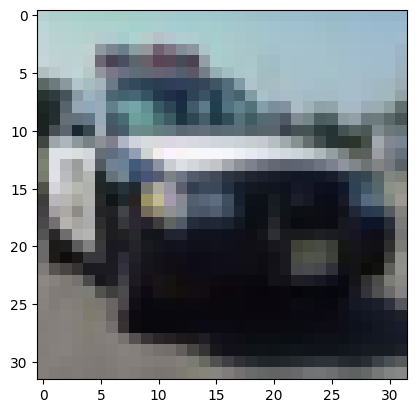

Введите метку класса


 1


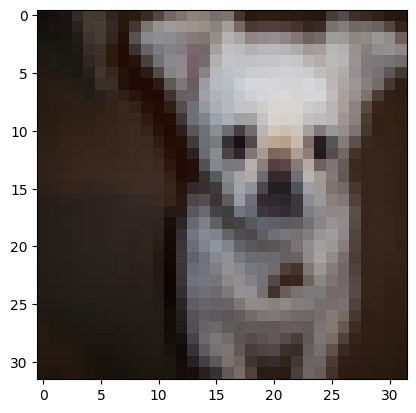

Введите метку класса


 5


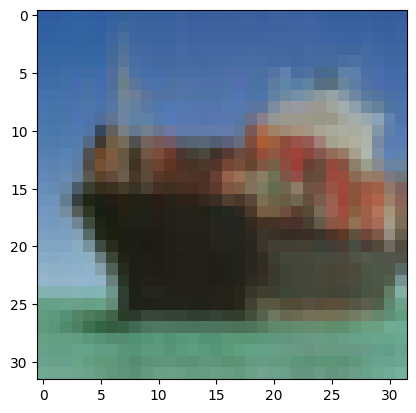

Введите метку класса


 8


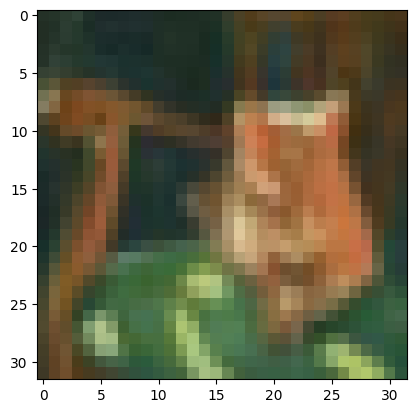

Введите метку класса


 3


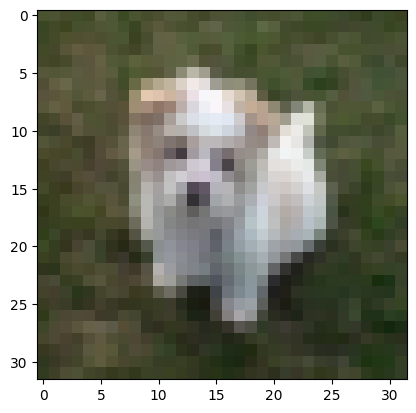

Введите метку класса


 5


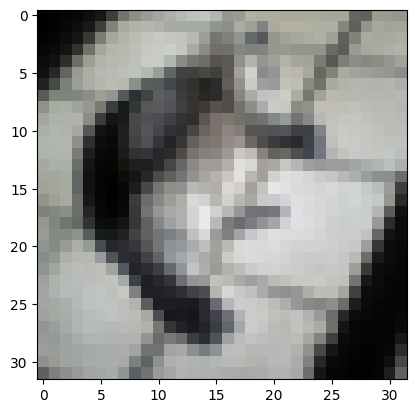

Введите метку класса


 3


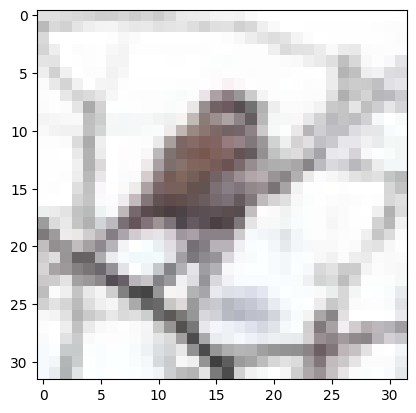

Введите метку класса


 2


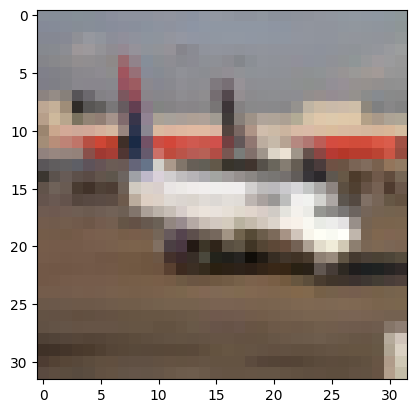

Введите метку класса


 0


Epoch 1/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.4511 - accuracy: 0.4281
Epoch 2/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.4417 - accuracy: 0.4314
Epoch 3/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.4295 - accuracy: 0.4389
Epoch 4/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.4215 - accuracy: 0.4428
Epoch 5/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.4114 - accuracy: 0.4483
Epoch 6/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.3980 - accuracy: 0.4532
Epoch 7/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.3921 - accuracy: 0.4566
Epoch 8/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.3815 - accuracy: 0.4630
Epoch 9/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.3725 - accuracy: 0.4661
Epoch 10/10
1251/1251 [==============================] - 5s 4ms/step - loss: 1.365

In [39]:
for i in range(ITERATIONS):
    unlabeled_samples_indexes = np.random.choice(len(X_val), size=NUM_SAMPLES, replace=False)
    unlabeled_images = X_val[unlabeled_samples_indexes]

    # Доразметка 
    uncertain_samples_indexes, outputs = label_images(unlabeled_images, model)

    # Добавление размеченных данных в тренировочную выборку
    X_train = np.concatenate([X_train, unlabeled_images])
    outputs = keras.utils.to_categorical(np.argmax(outputs, axis=1), num_classes=NUM_CLASSES)
    y_train = np.concatenate([y_train, outputs])

    # Удаление размеченных данных из валидационной выборки
    X_val = np.delete(X_val, unlabeled_samples_indexes, axis=0)

    # Повторное обучение модели с новыми данными
    model.fit(X_train, y_train, epochs=EPOCHS)

Проверим качество модели после активного обучения

In [41]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4488 - accuracy: 0.4445
Test accuracy: 0.44449999928474426


До активного обучения: Test accuracy: 0.36 \
После активного обучения: Test accuracy: 0.44